Wczytanie potrzebnych pakietów

In [1]:
!pip install smac
!pip install scikit-optimize
!pip install GPy==1.9.8
!pip install GPyOpt==1.2.1
!pip install xgboost==0.90
!pip install openml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for smac: filename=smac-2.0.2-py3-none-any.whl size=207413 sha256=69f4694eba7de58136503f341ba56b9074c8a3416df29e7f5277cf94ba369f45
  Stored in directory: /root/.cache/pip/wheels/9e/7b/0f/70fa663d850965f42f74fd6ed340a48de9e0f88526e4c57fa4
  Created wheel for pynisher: fil

In [2]:
from smac import HyperparameterOptimizationFacade, Scenario
from ConfigSpace import Configuration, ConfigurationSpace

In [3]:
from ConfigSpace import Configuration, ConfigurationSpace


In [4]:
from smac import Callback
#from smac import HyperparameterOptimizationFacade as HPOFacade
from smac import Scenario
from smac.runhistory import TrialInfo, TrialValue

In [5]:
import openml
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,  StandardScaler
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#bayes:

# Get additional files from Github
!wget https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/bayesian_optimization_util.py
from sklearn.base import clone
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern
from bayesian_optimization_util import plot_approximation, plot_acquisition, plot_convergence

import smac


--2023-11-21 17:53:41--  https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/bayesian_optimization_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1536 (1.5K) [text/plain]
Saving to: ‘bayesian_optimization_util.py’

bayesian_optimizati 100%[===================>]   1.50K  --.-KB/s    in 0s      

2023-11-21 17:53:41 (16.0 MB/s) - ‘bayesian_optimization_util.py’ saved [1536/1536]



In [6]:
from sklearn.model_selection import RandomizedSearchCV

Wczytanie zbiorów

In [51]:
# Get datasets
dataset1 = openml.datasets.get_dataset('credit-g')
dataset2 = openml.datasets.get_dataset('monks-problems-1')
dataset3 = openml.datasets.get_dataset('monks-problems-2')
dataset4 = openml.datasets.get_dataset('pc1')
# Get the data itself as a dataframe
X1, y1, _, _ = dataset1.get_data(dataset_format="dataframe")
X2, y2, _, _ = dataset2.get_data(dataset_format="dataframe")
X3, y3, _, _ = dataset3.get_data(dataset_format="dataframe")
X4, y4, _, _ = dataset4.get_data(dataset_format="dataframe")

[INFO][_api_calls.py:91] Starting [get] request for the URL https://www.openml.org/api/v1/xml/data/list/limit/10000/offset/0/status/active/data_name/credit-g


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


[INFO][_api_calls.py:103] 0.7375960s taken for [get] request for the URL https://www.openml.org/api/v1/xml/data/list/limit/10000/offset/0/status/active/data_name/credit-g
[INFO][_api_calls.py:91] Starting [get] request for the URL https://www.openml.org/api/v1/xml/data/list/limit/10000/offset/0/status/active/data_name/monks-problems-1


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


[INFO][_api_calls.py:103] 0.7042103s taken for [get] request for the URL https://www.openml.org/api/v1/xml/data/list/limit/10000/offset/0/status/active/data_name/monks-problems-1
[INFO][_api_calls.py:91] Starting [get] request for the URL https://www.openml.org/api/v1/xml/data/list/limit/10000/offset/0/status/active/data_name/monks-problems-2


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


[INFO][_api_calls.py:103] 0.5657551s taken for [get] request for the URL https://www.openml.org/api/v1/xml/data/list/limit/10000/offset/0/status/active/data_name/monks-problems-2
[INFO][_api_calls.py:91] Starting [get] request for the URL https://www.openml.org/api/v1/xml/data/list/limit/10000/offset/0/status/active/data_name/pc1


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


[INFO][_api_calls.py:103] 0.5657887s taken for [get] request for the URL https://www.openml.org/api/v1/xml/data/list/limit/10000/offset/0/status/active/data_name/pc1
[INFO][dataset.py:531] pickle write credit-g
[INFO][dataset.py:531] pickle write monks-problems-1
[INFO][dataset.py:531] pickle write monks-problems-2
[INFO][dataset.py:531] pickle write pc1


Podział na dane treningowe i testowe

In [52]:
y1 = X1['class']
X1 = X1.drop('class', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

y2 = X2['class']
X2 = X2.drop('class', axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size=0.2)

y3 = X3['class']
X3 = X3.drop('class', axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

y4 = X4['defects']
X4 = X4.drop('defects', axis=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2)

Funkcje optymalizacyjne

In [53]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test  = y1_test


def rf_to_opt(params: Configuration,seed: int = 0):
    model_pipeline = Pipeline([('preprocessing', col_trans),
                              ('model', RandomForestClassifier(n_estimators=np.int64(params['model__n_estimators']),
                                                               min_samples_split=np.float64(params["model__min_samples_split"]),
                                                               #min_impurity_decrease = np.float64(params['model__min_impurity_decrease']),
                                                               warm_start = bool(params["model__warm_start"]),
                                                               max_depth = np.int64(params['model__max_depth']),
                                                               min_samples_leaf=np.int64(params['model__min_samples_leaf']), random_state=seed))])


    model_pipeline.fit(X_train, y_train)
    return model_pipeline.score(X_test, y_test)



def gb_to_opt(params: Configuration,seed: int = 0):
    model_pipeline = Pipeline([('preprocessing', col_trans),
                               ('model', GradientBoostingClassifier(n_estimators=np.int64(params['model__n_estimators']),
                                                                subsample=np.float64(params['model__subsample']),
                                                                #min_impurity_decrease = np.float64(params['model__min_impurity_decrease']),
                                                                loss = str(params['model__loss']),
                                                                max_depth = np.int64(params['model__max_depth']),
                                                                min_samples_leaf=np.int64(params['model__min_samples_leaf']), random_state=seed))])


    model_pipeline.fit(X_train, y_train)
    return model_pipeline.score(X_test, y_test)


def svm_to_opt(params: Configuration,seed: int = 0):
    model_pipeline = Pipeline([('preprocessing', col_trans),
                               ('model', SVC (C=np.float64(params['model__C']),
                                              kernel=str(params['model__kernel']),
                                              gamma = np.float128(params['model__gamma']),
                                              tol = np.float128(params['model__tol']),
                                              #loss = np.str(params['model__loss']),
                                              random_state=seed))])


    model_pipeline.fit(X_train, y_train)
    return model_pipeline.score(X_test, y_test)


Siatka parametrów do RandomSearchCV dla lasu losowego

In [10]:
rf = RandomForestClassifier(random_state = 2023)
grid_forest_prep = {
    "model__n_estimators": [20, 50, 100, 200, 500, 700, 1000, 1500, 2000],
    "model__min_samples_split": [ 1e-5,1e-4,0.0001, 0.001, 0.01, 0.1],
    "model__warm_start": [True, False],
    "model__max_depth": [10, 30, 50, 70, 100,150,200, 500, 1000],
    "model__min_samples_leaf": [2, 3, 5, 10,15,20]
}


Dla lasu losowego rozważałyśmy następujące parametry dla metody Random Search:
- n_estimators, czyli liczba drzew decyzyjnych w lesie losowym,
- min_samples_split, czyli parametr informujący o minimalnej wymaganej liczbie obserwacji w danym węźle drzewa decyzyjnego, aby nastąpił podział węzła,
- min_impurity_decrease, czyli parametr określający jaki minimalny spadek zanieczyszczenia musi nastąpić po podziale węzła, aby ten podział nastąpił,
- max_depth, czyli maksymalna głębokość drzewa (najdłuższa ścieżka między węzłem korzenia a węzłem liścia),
- min_samples_leaf, czyli minimalna liczba próbek, które powinny być obecne w węźle liścia.

Siatka parametrów do RandomSearchCV dla Gradient Boosting

In [13]:
gb = GradientBoostingClassifier(random_state = 2023)
grid_gb_prep = {
    "model__n_estimators": [10, 50, 100, 150, 500, 1000, 1500, 2000, 2500],
    "model__subsample": [1e-5, 0.005, 0.01,0.05, 0.1, 0.5, 0.7, 0.9],
    "model__max_depth": [15, 50, 100, 150, 500, 1000, 1500, 2000, 2500],
    "model__min_samples_leaf": [1, 3, 5, 10,15,20],
    "model__loss": ['log_loss', 'exponential']
}


Dla Gradient Boosting rozważałyśmy następujące parametry dla metody Random Search:
- n_estimators, czyli liczba drzew decyzyjnych w lesie losowym,
- subsample, czyli frakcja obserwacji, która ma zostać wykorzystana do dopasowania poszczególnych uczących się modeli,
- min_impurity_decrease, czyli parametr określający jaki minimalny spadek zanieczyszczenia musi nastąpić po podziale węzła, aby ten podział nastąpił,
- max_depth, czyli maksymalna głębokość drzewa (najdłuższa ścieżka między węzłem korzenia a węzłem liścia),
- min_samples_leaf, czyli minimalna liczba próbek, które powinny być obecne w węźle liścia.

Przygotowanie funkcji do automatycznej imputacji

Siatka parametrów do RandomSearchCV dla SVM

In [11]:
svm = SVC(random_state = 2023)
grid_svm_prep = {
    "model__C": [0.001, 0.005 ,0.01, 1, 10, 20, 50, 100, 200, 500, 1000],
    "model__kernel": ['rbf', 'sigmoid', 'poly'],
    "model__gamma": [0.01, 0.1, 0.5, 1, 5, 20, 50, 100],
    "model__tol": [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1]
}

Preprocessing

In [14]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())])

num_pipeline.set_output(transform = "pandas")

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

cat_pipeline.set_output(transform = "pandas")

col_trans = ColumnTransformer(
transformers=[
    ('num_pipeline',num_pipeline, make_column_selector( dtype_include= np.number )),
    ('cat_pipeline',cat_pipeline,make_column_selector(dtype_include=[np.object_,'category']))
    ],
remainder='passthrough',
n_jobs=-1)

col_trans.set_output(transform = "pandas")

model_pipeline1 = Pipeline([('preprocessing', col_trans),
                               ('model', rf)])
model_pipeline2 = Pipeline([('preprocessing', col_trans),
                               ('model', gb)])
model_pipeline3 = Pipeline([('preprocessing', col_trans),
                               ('model', svm)])


**Znalezienie najlepszych parametrów dla lasu losowego**



In [54]:
rs_rf_prep = RandomizedSearchCV(model_pipeline1, grid_forest_prep, cv=5, scoring='accuracy', random_state = 2023, n_iter = 25, n_jobs=-1)
#rs_rf = RandomizedSearchCV(rf, grid_forest, cv=5, scoring='accuracy', random_state = 2023)

rs_rf_prep.fit(X1_train, y1_train)
rf_params_1=rs_rf_prep.best_params_
res_rf_1 = rs_rf_prep.cv_results_
rf_params_1=rs_rf_prep.best_params_
print(rf_params_1)
print(rs_rf_prep.score(X1_test, y1_test))
score_rf_1 = rs_rf_prep.score(X1_test, y1_test)
print(res_rf_1['mean_test_score'])

{'model__warm_start': False, 'model__n_estimators': 2000, 'model__min_samples_split': 0.001, 'model__min_samples_leaf': 2, 'model__max_depth': 150}
0.83
[0.715   0.7125  0.7325  0.72875 0.72875 0.70375 0.71    0.69875 0.73
 0.695   0.745   0.7275  0.7225  0.7075  0.725   0.74375 0.705   0.715
 0.71125 0.71125 0.72625 0.73    0.705   0.73    0.73125]


In [55]:
rs_rf_prep.fit(X2_train, y2_train)
rf_params_2=rs_rf_prep.best_params_
res_rf_2 = rs_rf_prep.cv_results_
rf_params_2=rs_rf_prep.best_params_
print(rf_params_2)
print(rs_rf_prep.score(X2_test, y2_test))
score_rf_2 = rs_rf_prep.score(X2_test, y2_test)
print(res_rf_2['mean_test_score'])

{'model__warm_start': False, 'model__n_estimators': 2000, 'model__min_samples_split': 0.001, 'model__min_samples_leaf': 2, 'model__max_depth': 150}
1.0
[0.85130235 0.82872829 0.98186925 0.95255363 0.96384065 0.84440756
 0.86034219 0.76121042 0.96386619 0.75896323 0.99093463 0.99093463
 0.98641471 0.84456078 0.94583759 0.98419305 0.81297242 0.85130235
 0.80178754 0.85357508 0.961619   0.97737487 0.78603166 0.97737487
 0.95934627]


In [56]:
rs_rf_prep.fit(X3_train, y3_train)
rf_params_3=rs_rf_prep.best_params_
res_rf_3 = rs_rf_prep.cv_results_
rf_params_3=rs_rf_prep.best_params_
print(rf_params_3)
print(rs_rf_prep.score(X3_test, y3_test))
score_rf_3 = rs_rf_prep.score(X3_test, y3_test)
print(res_rf_3['mean_test_score'])

{'model__warm_start': False, 'model__n_estimators': 2000, 'model__min_samples_split': 0.001, 'model__min_samples_leaf': 2, 'model__max_depth': 150}
0.8429752066115702
[0.65416667 0.65       0.73125    0.68958333 0.70208333 0.65
 0.65625    0.65       0.70208333 0.65       0.79166667 0.78333333
 0.75416667 0.65       0.675      0.75       0.65       0.65625
 0.65       0.65625    0.7        0.70416667 0.65       0.70416667
 0.70208333]


In [57]:
rs_rf_prep.fit(X4_train, y4_train)
rf_params_4=rs_rf_prep.best_params_
res_rf_4 = rs_rf_prep.cv_results_
rf_params_4=rs_rf_prep.best_params_
print(rf_params_4)
print(rs_rf_prep.score(X4_test, y4_test))
score_rf_4 = rs_rf_prep.score(X4_test, y4_test)
print(res_rf_4['mean_test_score'])

{'model__warm_start': False, 'model__n_estimators': 50, 'model__min_samples_split': 0.0001, 'model__min_samples_leaf': 2, 'model__max_depth': 10}
0.9099099099099099
[0.93686917 0.93686917 0.94250619 0.94476608 0.94476608 0.93686917
 0.93686917 0.93686917 0.94476608 0.93686917 0.94137625 0.94475973
 0.94701962 0.93686917 0.94475973 0.94137625 0.93686917 0.93686917
 0.93686917 0.93686917 0.94476608 0.94363613 0.93686917 0.94363613
 0.94476608]


In [58]:
mean_rf = []
for i in range (0,24):
  x = (res_rf_1['mean_test_score'][i] + res_rf_2['mean_test_score'][i] + res_rf_3['mean_test_score'][i] + res_rf_4['mean_test_score'][i])/4
  mean_rf.append(x)

mean_best_rf = res_rf_1['params'][mean_rf.index(max(mean_rf))]

Dopasowanie na średnio najlepszych i wyznaczenie różnic

In [61]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test  = y1_test

score_mean_rf_1 = rf_to_opt(mean_best_rf)
print(score_mean_rf_1)

X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test  = y2_test

score_mean_rf_2 = rf_to_opt(mean_best_rf)
print(score_mean_rf_2)

X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test  = y3_test

score_mean_rf_3 = rf_to_opt(mean_best_rf)
print(score_mean_rf_3)

X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test  = y4_test

score_mean_rf_4 = rf_to_opt(mean_best_rf)
print(score_mean_rf_4)


0.825
1.0
0.8429752066115702
0.9144144144144144


In [130]:
dif1 = score_mean_rf_1 - score_rf_1
dif2 = score_mean_rf_2 - score_rf_2
dif3 = score_mean_rf_3 - score_rf_3
dif4 = score_mean_rf_4 - score_rf_4

In [131]:
tunability_rf = (dif1 + dif2 + dif3+ dif4)/4
print(tunability_rf)

-0.00012387387387388649


dane 1


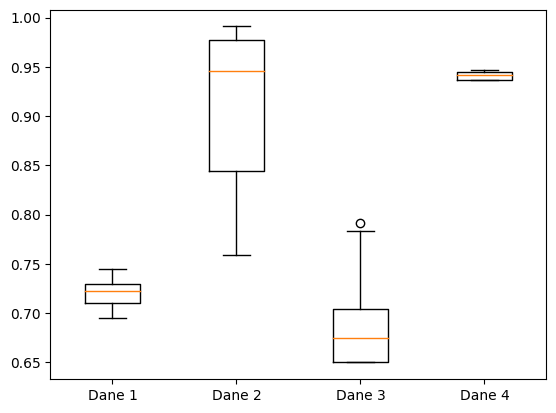

In [68]:
print('dane 1')
plt.boxplot([res_rf_1['mean_test_score'], res_rf_2['mean_test_score'], res_rf_3['mean_test_score'], res_rf_4['mean_test_score']],
             labels=['Dane 1', 'Dane 2', 'Dane 3', 'Dane 4'])
plt.show()


dane 1


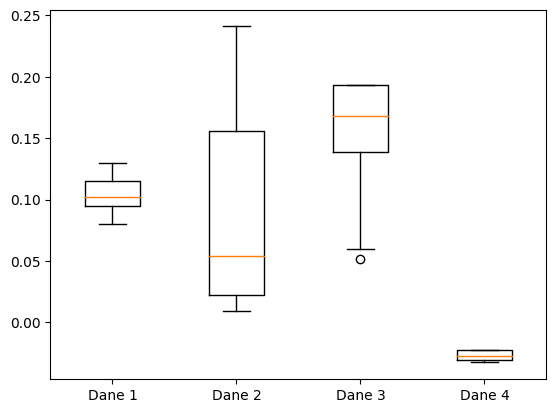

In [69]:
plt.boxplot([score_mean_rf_1 - res_rf_1['mean_test_score'], score_mean_rf_2 - res_rf_2['mean_test_score'], score_mean_rf_3 - res_rf_3['mean_test_score'], score_mean_rf_4 - res_rf_4['mean_test_score']],
             labels=['Dane 1', 'Dane 2', 'Dane 3', 'Dane 4'])
plt.show()


Stablizacja score w zależności od numeru iteracji

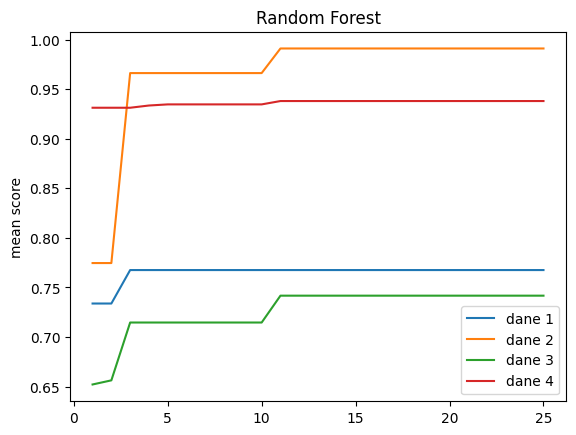

In [ ]:
ox = list(range(1,26))
# Utwórz wykresy
plt.plot(ox, np.maximum.accumulate(res_rf_1['mean_test_score']), label='dane 1')
plt.plot(ox, np.maximum.accumulate(res_rf_2['mean_test_score']), label='dane 2')
plt.plot(ox, np.maximum.accumulate(res_rf_3['mean_test_score']), label='dane 3')
plt.plot(ox, np.maximum.accumulate(res_rf_4['mean_test_score']), label='dane 4')

# Dodaj tytuł i etykiety osi
plt.title('Random Forest')
#plt.xlabel('n iter')
plt.ylabel('mean score')

# Dodaj legendę
plt.legend()

# Wyświetl wykres
plt.show()

**Znalezienie najlepszych parametrów dla Gradient Boosting**


In [84]:
rs_gb_prep = RandomizedSearchCV(model_pipeline2, grid_gb_prep, cv=5, scoring='accuracy', random_state = 2023, n_iter = 25)

rs_gb_prep.fit(X1_train, y1_train)
gb_params_1=rs_gb_prep.best_params_
res_gb_1 = rs_gb_prep.cv_results_
gb_params_1=rs_gb_prep.best_params_
print(gb_params_1)
print(rs_gb_prep.score(X1_test, y1_test))
score_gb_1 = rs_gb_prep.score(X1_test, y1_test)
print(res_gb_1['mean_test_score'])

{'model__subsample': 0.7, 'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': 50, 'model__loss': 'log_loss'}
0.83
[0.72    0.68625 0.73875 0.70375 0.68625 0.70875 0.685   0.65125 0.71
 0.74125 0.71625 0.68625 0.72375 0.68625 0.71875 0.72    0.7325  0.72875
 0.73    0.38625 0.68625 0.6875  0.68625 0.6925  0.68625]


In [85]:
rs_gb_prep.fit(X2_train, y2_train)
gb_params_2=rs_gb_prep.best_params_
res_gb_2 = rs_gb_prep.cv_results_
gb_params_2=rs_gb_prep.best_params_
print(gb_params_2)
print(rs_gb_prep.score(X2_test, y2_test))
score_gb_2 = rs_gb_prep.score(X2_test, y2_test)
print(res_gb_2['mean_test_score'])

{'model__subsample': 0.9, 'model__n_estimators': 1500, 'model__min_samples_leaf': 5, 'model__max_depth': 100, 'model__loss': 'exponential'}
1.0
[1.         0.50224719 1.         0.98868744 0.50449438 0.73416752
 0.84458631 0.99772727 1.         1.         1.         0.5
 1.         0.50224719 1.         1.         1.         1.
 1.         0.50224719 0.50224719 0.72300817 0.49775281 1.
 0.49775281]


In [86]:
rs_gb_prep.fit(X3_train, y3_train)
gb_params_3=rs_gb_prep.best_params_
res_gb_3 = rs_gb_prep.cv_results_
gb_params_3=rs_gb_prep.best_params_
print(gb_params_3)
print(rs_gb_prep.score(X3_test, y3_test))
score_gb_3 = rs_gb_prep.score(X3_test, y3_test)
print(res_gb_3['mean_test_score'])

{'model__subsample': 0.5, 'model__n_estimators': 2500, 'model__min_samples_leaf': 15, 'model__max_depth': 15, 'model__loss': 'log_loss'}
1.0
[0.97916667 0.65       0.9625     0.85208333 0.65       0.58958333
 0.6125     0.67291667 0.69375    0.96666667 0.99791667 0.65
 0.89583333 0.53333333 0.98125    0.97916667 0.89166667 0.99583333
 0.75208333 0.59166667 0.65       0.64166667 0.65       0.88541667
 0.46666667]


In [87]:
rs_gb_prep.fit(X4_train, y4_train)
gb_params_4=rs_gb_prep.best_params_
res_gb_4 = rs_gb_prep.cv_results_
gb_params_4=rs_gb_prep.best_params_
print(gb_params_4)
print(rs_gb_prep.score(X4_test, y4_test))
score_gb_4 = rs_gb_prep.score(X4_test, y4_test)
print(res_gb_4['mean_test_score'])

{'model__subsample': 0.7, 'model__n_estimators': 1000, 'model__min_samples_leaf': 3, 'model__max_depth': 1500, 'model__loss': 'exponential'}
0.9054054054054054
[0.94139529 0.93686917 0.94476608 0.94362344 0.93686917 0.9120358
 0.90528153 0.89512474 0.87484289 0.93686917 0.9301149  0.93686917
 0.94251889 0.58869422 0.9391354  0.93012759 0.94137625 0.93572018
 0.93574557 0.93686917 0.93686917 0.93686917 0.93686917 0.74288707
 0.93686917]


średnio najlepsza siatka gb

In [88]:
mean_gb = []
for i in range (0,2):
  x = (res_gb_1['mean_test_score'][i] + res_gb_2['mean_test_score'][i] + res_gb_3['mean_test_score'][i] + res_gb_4['mean_test_score'][i])/4
  mean_gb.append(x)

mean_best_gb = res_gb_1['params'][mean_gb.index(max(mean_gb))]

In [ ]:
print(res_gb_1['params'])

[{'model__subsample': 0.9, 'model__n_estimators': 1500, 'model__min_samples_leaf': 5, 'model__max_depth': 100, 'model__loss': 'exponential'}, {'model__subsample': 0.005, 'model__n_estimators': 1000, 'model__min_samples_leaf': 1, 'model__max_depth': 500, 'model__loss': 'exponential'}, {'model__subsample': 0.7, 'model__n_estimators': 1000, 'model__min_samples_leaf': 3, 'model__max_depth': 1500, 'model__loss': 'exponential'}, {'model__subsample': 0.9, 'model__n_estimators': 10, 'model__min_samples_leaf': 5, 'model__max_depth': 1500, 'model__loss': 'log_loss'}, {'model__subsample': 0.005, 'model__n_estimators': 10, 'model__min_samples_leaf': 1, 'model__max_depth': 1000, 'model__loss': 'exponential'}, {'model__subsample': 0.1, 'model__n_estimators': 100, 'model__min_samples_leaf': 10, 'model__max_depth': 500, 'model__loss': 'exponential'}, {'model__subsample': 0.05, 'model__n_estimators': 500, 'model__min_samples_leaf': 5, 'model__max_depth': 1500, 'model__loss': 'exponential'}, {'model__su

Dopasowanie średnio najlepszych i wyznaczenie różnic

In [89]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test  = y1_test

score_mean_gb_1 = gb_to_opt(mean_best_gb)
print(score_mean_gb_1)

X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test  = y2_test

score_mean_gb_2 = gb_to_opt(mean_best_gb)
print(score_mean_gb_2)

X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test  = y3_test

score_mean_gb_3 = gb_to_opt(mean_best_gb)
print(score_mean_gb_3)

X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test  = y4_test

score_mean_gb_4 = gb_to_opt(mean_best_gb)
print(score_mean_gb_4)

diff_gb = [score_mean_gb_1 - score_gb_1,score_mean_gb_2 - score_gb_2,score_mean_gb_3 - score_gb_3,score_mean_gb_4 - score_gb_4]

0.81
1.0
1.0
0.9099099099099099


In [128]:
dif1 = score_mean_gb_1 - score_gb_1
dif2 = score_mean_gb_2 - score_gb_2
dif3 = score_mean_gb_3 - score_gb_3
dif4 = score_mean_gb_4 - score_gb_4

In [129]:
tunability_gb = (dif1 + dif2 + dif3+ dif4)/4
print(tunability_gb)

-0.0038738738738738343


dane 1


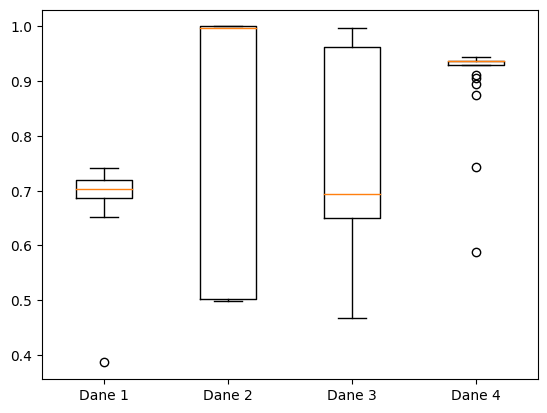

In [93]:
print('dane 1')
plt.boxplot([res_gb_1['mean_test_score'], res_gb_2['mean_test_score'], res_gb_3['mean_test_score'], res_gb_4['mean_test_score']],
             labels=['Dane 1', 'Dane 2', 'Dane 3', 'Dane 4'])
plt.show()

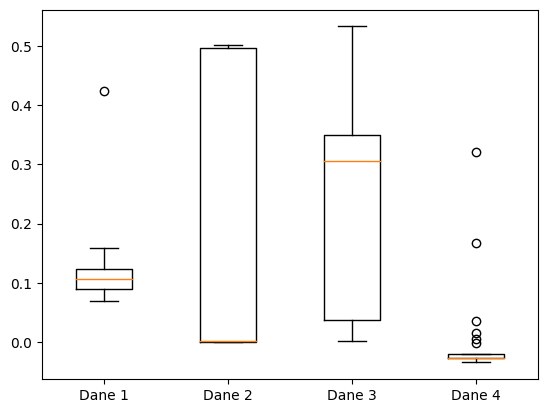

In [94]:
plt.boxplot([score_mean_gb_1 - res_gb_1['mean_test_score'], score_mean_gb_2 - res_gb_2['mean_test_score'], score_mean_gb_3 - res_gb_3['mean_test_score'], score_mean_gb_4 - res_gb_4['mean_test_score']],
             labels=['Dane 1', 'Dane 2', 'Dane 3', 'Dane 4'])
plt.show()

Stabilizacja score w zależności od iteracji

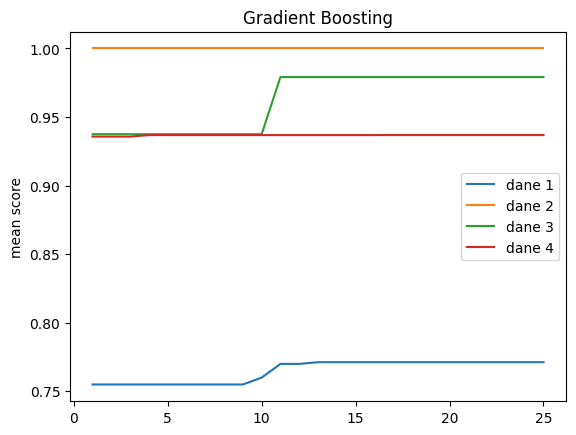

In [ ]:
ox = list(range(1,26))
# Utwórz wykresy
plt.plot(ox, np.maximum.accumulate(res_gb_1['mean_test_score']), label='dane 1')
plt.plot(ox, np.maximum.accumulate(res_gb_2['mean_test_score']), label='dane 2')
plt.plot(ox, np.maximum.accumulate(res_gb_3['mean_test_score']), label='dane 3')
plt.plot(ox, np.maximum.accumulate(res_gb_4['mean_test_score']), label='dane 4')

# Dodaj tytuł i etykiety osi
plt.title('Gradient Boosting')
#plt.xlabel('n iter')
plt.ylabel('mean score')

# Dodaj legendę
plt.legend()

# Wyświetl wykres
plt.show()

**Znalezienie najlepszych parametrów dla SVM**

In [96]:
rs_svm_prep = RandomizedSearchCV(model_pipeline3, grid_svm_prep, cv=5, scoring='accuracy', random_state = 2023, n_iter = 25)
#rs_svm = RandomizedSearchCV(svm, grid_svm, cv=5, scoring='accuracy', random_state = 2023)

rs_svm_prep.fit(X1_train, y1_train)
svm_params_1=rs_svm_prep.best_params_
res_svm_1 = rs_svm_prep.cv_results_
svm_params_1=rs_svm_prep.best_params_
print(svm_params_1)
print(rs_svm_prep.score(X1_test, y1_test))
score_svm_1 = rs_svm_prep.score(X1_test, y1_test)
print(res_svm_1['mean_test_score'])

{'model__tol': 0.0001, 'model__kernel': 'rbf', 'model__gamma': 0.01, 'model__C': 20}
0.82
[0.68625 0.70875 0.73375 0.68625 0.70875 0.68625 0.68625 0.60625 0.68625
 0.70875 0.68625 0.60625 0.68625 0.70875 0.68625 0.5725  0.68375 0.70875
 0.68875 0.70875 0.68625 0.73125 0.68625 0.70875 0.68625]


In [97]:
rs_svm_prep.fit(X2_train, y2_train)
svm_params_2=rs_svm_prep.best_params_
res_svm_2 = rs_svm_prep.cv_results_
svm_params_2=rs_svm_prep.best_params_
print(svm_params_2)
print(rs_svm_prep.score(X2_test, y2_test))
score_svm_2 = rs_svm_prep.score(X2_test, y2_test)
print(res_svm_2['mean_test_score'])

{'model__tol': 0.001, 'model__kernel': 'poly', 'model__gamma': 5, 'model__C': 0.005}
1.0
[0.6328907  1.         0.7409857  0.6328907  1.         0.6328907
 0.6328907  0.51562819 0.50224719 1.         0.50224719 0.51562819
 0.6328907  1.         0.50224719 0.46187436 1.         1.
 0.50224719 1.         0.50224719 1.         0.99775281 1.
 0.50224719]


In [98]:
rs_svm_prep.fit(X3_train, y3_train)
svm_params_3=rs_svm_prep.best_params_
res_svm_3 = rs_svm_prep.cv_results_
svm_params_3=rs_svm_prep.best_params_
print(svm_params_3)
print(rs_svm_prep.score(X3_test, y3_test))
score_svm_3 = rs_svm_prep.score(X3_test, y3_test)
print(res_svm_3['mean_test_score'])

{'model__tol': 0.001, 'model__kernel': 'poly', 'model__gamma': 5, 'model__C': 0.005}
1.0
[0.79166667 1.         0.65       0.79166667 1.         0.79166667
 0.79166667 0.4        0.65       1.         0.65       0.40416667
 0.79166667 0.95208333 0.65       0.40833333 0.76666667 1.
 0.65       1.         0.65       1.         0.6875     1.
 0.65      ]


In [99]:
rs_svm_prep.fit(X4_train, y4_train)
svm_params_4=rs_svm_prep.best_params_
res_svm_4 = rs_svm_prep.cv_results_
svm_params_4=rs_svm_prep.best_params_
print(svm_params_4)
print(rs_svm_prep.score(X4_test, y4_test))
score_svm_4 = rs_svm_prep.score(X4_test, y4_test)
print(res_svm_4['mean_test_score'])

{'model__tol': 1e-06, 'model__kernel': 'rbf', 'model__gamma': 20, 'model__C': 20}
0.9054054054054054
[0.94588967 0.91541929 0.93460928 0.94927315 0.89179204 0.9492795
 0.94927315 0.89407097 0.93686917 0.89179204 0.93686917 0.89407097
 0.94927315 0.91771091 0.93686917 0.89405193 0.92897226 0.89179204
 0.93798007 0.91432743 0.93686917 0.93123215 0.93575827 0.91541929
 0.93573922]


średnio najlepsza siatka SVM

In [100]:
mean_svm = []
for i in range (0,24):
  x = (res_svm_1['mean_test_score'][i] + res_svm_2['mean_test_score'][i] + res_svm_3['mean_test_score'][i] + res_svm_4['mean_test_score'][i])/4
  mean_svm.append(x)

mean_best_svm = res_svm_1['params'][mean_svm.index(max(mean_svm))]

Dopasowanie średnio najlepszych i dopasowanie

In [101]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test  = y1_test

score_mean_svm_1 = svm_to_opt(mean_best_svm)
print(score_mean_svm_1)

X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test  = y2_test

score_mean_svm_2 = svm_to_opt(mean_best_svm)
print(score_mean_svm_2)

X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test  = y3_test

score_mean_svm_3 = svm_to_opt(mean_best_svm)
print(score_mean_svm_3)

X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test  = y4_test

score_mean_svm_4 = svm_to_opt(mean_best_svm)
print(score_mean_svm_4)

diff_svm = [score_mean_svm_1 - score_svm_1,score_mean_svm_2 - score_svm_2,score_mean_svm_3 - score_svm_3,score_mean_svm_4 - score_svm_4]

0.815
1.0
1.0
0.8828828828828829


In [126]:
dif1 = score_mean_svm_1 - score_svm_1
dif2 = score_mean_svm_2 - score_svm_2
dif3 = score_mean_svm_3 - score_svm_3
dif4 = score_mean_svm_4 - score_svm_4


In [127]:
tunability_svm = (dif1 + dif2 + dif3+ dif4)/4
print(tunability_svm)

-0.00688063063063063


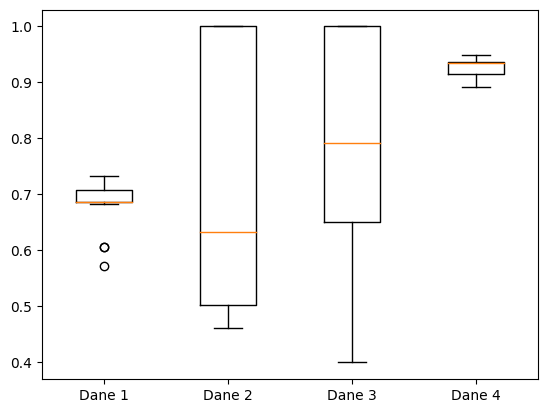

In [104]:
plt.boxplot([res_svm_1['mean_test_score'], res_svm_2['mean_test_score'], res_svm_3['mean_test_score'], res_svm_4['mean_test_score']],
             labels=['Dane 1', 'Dane 2', 'Dane 3', 'Dane 4'])
plt.show()

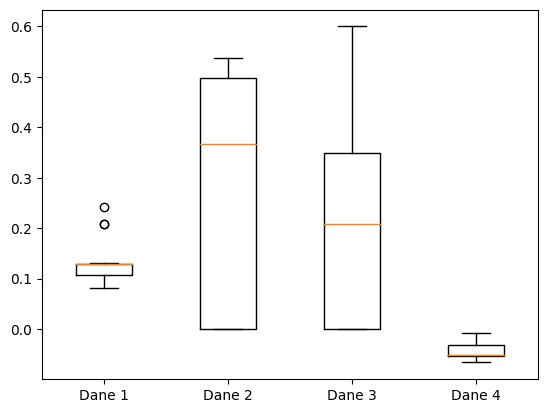

In [105]:
plt.boxplot([score_mean_svm_1 - res_svm_1['mean_test_score'], score_mean_svm_2 - res_svm_2['mean_test_score'], score_mean_svm_3 - res_svm_3['mean_test_score'], score_mean_svm_4 - res_svm_4['mean_test_score']],
             labels=['Dane 1', 'Dane 2', 'Dane 3', 'Dane 4'])
plt.show()

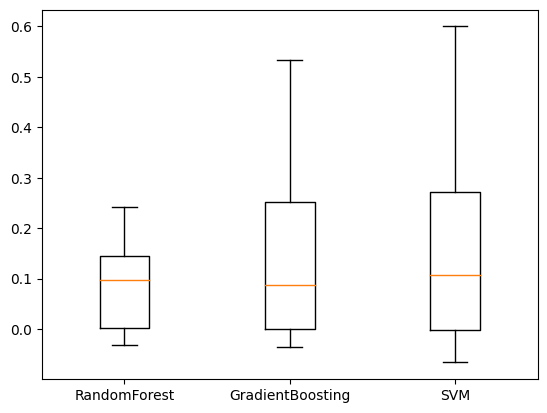

In [141]:
tune_rf = []
tune_rf.append(score_mean_rf_1 - res_rf_1['mean_test_score'])
tune_rf.append(score_mean_rf_2 - res_rf_2['mean_test_score'])
tune_rf.append(score_mean_rf_3 - res_rf_3['mean_test_score'])
tune_rf.append(score_mean_rf_4 - res_rf_4['mean_test_score'])

tune_gb = []
tune_gb.append(score_mean_gb_1 - res_gb_1['mean_test_score'])
tune_gb.append(score_mean_gb_2 - res_gb_2['mean_test_score'])
tune_gb.append(score_mean_gb_3 - res_gb_3['mean_test_score'])
tune_gb.append(score_mean_gb_4 - res_gb_4['mean_test_score'])

tune_svm = []
tune_svm.append(score_mean_svm_1 - res_svm_1['mean_test_score'])
tune_svm.append(score_mean_svm_2 - res_svm_2['mean_test_score'])
tune_svm.append(score_mean_svm_3 - res_svm_3['mean_test_score'])
tune_svm.append(score_mean_svm_4 - res_svm_4['mean_test_score'])

plt.boxplot([np.array(tune_rf).flatten(), np.array(tune_gb).flatten(), np.array(tune_svm).flatten()], labels = ['RandomForest', 'GradientBoosting', 'SVM'])
plt.show()

Stabilizacja score w zależności od iteracji

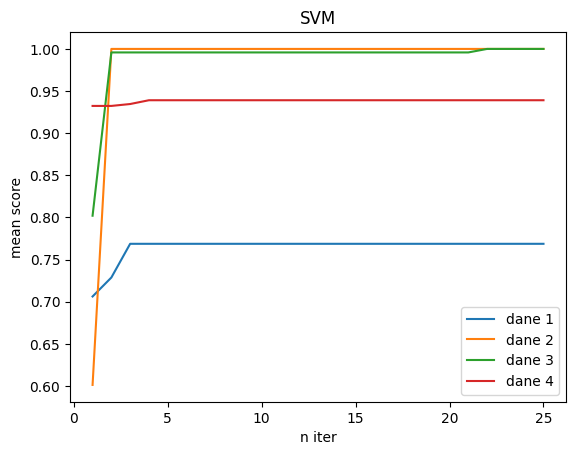

In [ ]:
ox = list(range(1,26))
# Utwórz wykresy
plt.plot(ox, np.maximum.accumulate(res_svm_1['mean_test_score']), label='dane 1')
plt.plot(ox, np.maximum.accumulate(res_svm_2['mean_test_score']), label='dane 2')
plt.plot(ox, np.maximum.accumulate(res_svm_3['mean_test_score']), label='dane 3')
plt.plot(ox, np.maximum.accumulate(res_svm_4['mean_test_score']), label='dane 4')

# Dodaj tytuł i etykiety osi
plt.title('SVM')
plt.xlabel('n iter')
plt.ylabel('mean score')

# Dodaj legendę
plt.legend()

# Wyświetl wykres
plt.show()

## **Bayesian Optimization**

In [107]:
X1_train = col_trans.fit_transform(X1_train)
X1_test = col_trans.transform(X1_test)

X2_train = col_trans.fit_transform(X2_train)
X2_test = col_trans.transform(X2_test)

X3_train = col_trans.fit_transform(X3_train)
X3_test = col_trans.transform(X3_test)

X4_train = col_trans.fit_transform(X4_train)
X4_test = col_trans.transform(X4_test)


Siatki do optymalizacji dla danych/modeli

In [114]:
grid_forest_prep1 = {
    "model__n_estimators": (20, 2000),  # Przedział od 20 do 2000
    "model__min_samples_split": (1e-10, 0.1),  # Przedział od 0.0 do 0.1
    "model__min_impurity_decrease": (0.0, 0.01),  # Przedział od 0.0 do 0.01
    "model__max_depth": (10, 1000),  # Przedział od 10 do 1000
    "model__warm_start": [True, False],
    "model__min_samples_leaf": (2, 20)  # Przedział od 2 do 20
}

grid_gb_prep1 = {
    "model__n_estimators": (5, 2500),
    "model__subsample": (0.01, 0.95),
    "model__min_impurity_decrease": (0.0, 0.01),
    "model__max_depth": (15, 2500),
    "model__loss": ['log_loss', 'exponential'],
    "model__min_samples_leaf": (1,20)
}

grid_svm_prep1 = {
    "model__C": (0.01, 1000),
    "model__kernel": ['poly', 'rbf', 'sigmoid'],
    "model__gamma": (0.0, 100),
    "model__tol": (1e-6, 0.01)
}


Funkcja - score

In [109]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test  = y1_test


def rf_to_opt(params: Configuration,seed: int = 0):
    model_pipeline = Pipeline([('preprocessing', col_trans),
                              ('model', RandomForestClassifier(n_estimators=np.int64(params['model__n_estimators']),
                                                               min_samples_split=np.float64(params["model__min_samples_split"]),
                                                               #min_impurity_decrease = np.float64(params['model__min_impurity_decrease']),
                                                               warm_start = bool(params["model__warm_start"]),
                                                               max_depth = np.int64(params['model__max_depth']),
                                                               min_samples_leaf=np.int64(params['model__min_samples_leaf']), random_state=seed))])


    model_pipeline.fit(X_train, y_train)
    return -model_pipeline.score(X_test, y_test)



def gb_to_opt(params: Configuration,seed: int = 0):
    model_pipeline = Pipeline([('preprocessing', col_trans),
                               ('model', GradientBoostingClassifier(n_estimators=np.int64(params['model__n_estimators']),
                                                                subsample=np.float64(params['model__subsample']),
                                                                #min_impurity_decrease = np.float64(params['model__min_impurity_decrease']),
                                                                loss = str(params['model__loss']),
                                                                max_depth = np.int64(params['model__max_depth']),
                                                                min_samples_leaf=np.int64(params['model__min_samples_leaf']), random_state=seed))])


    model_pipeline.fit(X_train, y_train)
    return -model_pipeline.score(X_test, y_test)


def svm_to_opt(params: Configuration,seed: int = 0):
    model_pipeline = Pipeline([('preprocessing', col_trans),
                               ('model', SVC (C=np.float64(params['model__C']),
                                              kernel=str(params['model__kernel']),
                                              gamma = np.float128(params['model__gamma']),
                                              tol = np.float128(params['model__tol']),
                                              #loss = np.str(params['model__loss']),
                                              random_state=seed))])


    model_pipeline.fit(X_train, y_train)
    return -model_pipeline.score(X_test, y_test)


In [112]:
val = []
class CustomCallback(Callback):
    def __init__(self) -> None:
        self.trials_counter = 0

    def on_tell_end(self, smbo: smac.main.smbo.SMBO, info: TrialInfo, value: TrialValue) -> bool | None:
        self.trials_counter += 1
        incumbent = smbo.intensifier.get_incumbent()
        assert incumbent is not None
        #print(f"najlepsze par: {incumbent.get_dictionary()}")
        x = -smbo.runhistory.get_cost(incumbent)
        val.append(x)

        return None

Dopasowanie Forest

In [115]:
#data1
val = []
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test
configspace = ConfigurationSpace(grid_forest_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25, seed=2023)
sma = HyperparameterOptimizationFacade(scenario, rf_to_opt, overwrite=True,callbacks=[CustomCallback()])
rf_bayes_opt_1= sma.optimize()
print(f"najlepsze par dla rf dane 1: {rf_bayes_opt_1.get_dictionary()}")
score_rf_1_bayes = rf_to_opt(rf_bayes_opt_1)
print(score_rf_1_bayes)

val_rf_1 = val.copy()


#data2
val = []
X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test


configspace = ConfigurationSpace(grid_forest_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25, seed=2023)
sma = HyperparameterOptimizationFacade(scenario, rf_to_opt, overwrite=True,callbacks=[CustomCallback()])
rf_bayes_opt_2= sma.optimize()
print(f"najlepsze par dla rf dane 2: {rf_bayes_opt_2.get_dictionary()}")
score_rf_2_bayes = rf_to_opt(rf_bayes_opt_2)
print(score_rf_2_bayes)

val_rf_2 = val.copy()

#data3
val = []
X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test = y3_test

configspace = ConfigurationSpace(grid_forest_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25, seed=2023)
sma = HyperparameterOptimizationFacade(scenario, rf_to_opt, overwrite=True,callbacks=[CustomCallback()])
rf_bayes_opt_3= sma.optimize()
print(f"najlepsze par dla rf dane 3: {rf_bayes_opt_3.get_dictionary()}")
score_rf_3_bayes = rf_to_opt(rf_bayes_opt_3)
print(score_rf_3_bayes)

val_rf_3 = val.copy()

#data4
val = []
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

configspace = ConfigurationSpace(grid_forest_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25, seed=2023)
sma = HyperparameterOptimizationFacade(scenario, rf_to_opt, overwrite=True,callbacks=[CustomCallback()])
rf_bayes_opt_4= sma.optimize()
print(f"najlepsze par dla rf dane 4: {rf_bayes_opt_4.get_dictionary()}")
score_rf_4_bayes = rf_to_opt(rf_bayes_opt_4)
print(score_rf_4_bayes)

val_rf_4 = val.copy()


[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config c1a0c1 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config bb7d9d and rejected config c1a0c1 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 19e2f0 and rejected config bb7d9d as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 6bf9e9 and rejected config 19e2f0 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: in

<ipython-input-115-26f54c634612>:11: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla rf dane 1: {rf_bayes_opt_1.get_dictionary()}")


-0.825
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config c1a0c1 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config bb7d9d and rejected config c1a0c1 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 13a272 and rejected config bb7d9d as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 0c3886 and rejected config 13a272 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock t

<ipython-input-115-26f54c634612>:30: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla rf dane 2: {rf_bayes_opt_2.get_dictionary()}")


-1.0
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config c1a0c1 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config bb7d9d and rejected config c1a0c1 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 7f6d9c and rejected config bb7d9d as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config e889d2 and rejected config 7f6d9c as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config c721aa and rejected config e889d2 as incumbent becaus

<ipython-input-115-26f54c634612>:47: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla rf dane 3: {rf_bayes_opt_3.get_dictionary()}")


-0.8429752066115702
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config c1a0c1 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config bb7d9d and rejected config c1a0c1 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 2db1a3 and rejected config bb7d9d as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
najlepsze par dla rf dane 4: {'model__max_d

<ipython-input-115-26f54c634612>:64: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla rf dane 4: {rf_bayes_opt_4.get_dictionary()}")


-0.918918918918919


In [117]:
dif_rf_bay_1 = score_mean_rf_1 + score_rf_1_bayes
dif_rf_bay_2 = score_mean_rf_2 + score_rf_2_bayes
dif_rf_bay_3 = score_mean_rf_3 + score_rf_3_bayes
dif_rf_bay_4 = score_mean_rf_4 + score_rf_4_bayes

tunability_rf_bayes = (dif_rf_bay_1 + dif_rf_bay_2 + dif_rf_bay_3 + dif_rf_bay_4)/4
print(tunability_rf_bayes)

-0.0011261261261261424


In [ ]:
print(val_rf_1)
print(val_rf_2)
print(val_rf_3)
print(val_rf_4)

[0.69, 0.69, 0.735, 0.735, 0.735, 0.735, 0.735, 0.735, 0.735, 0.735, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76]
[0.9017857142857143, 0.9017857142857143, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.7024793388429752, 0.7024793388429752, 0.7768595041322314, 0.7768595041322314, 0.7768595041322314, 0.7768595041322314, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8016528925619835, 0.8264462809917356, 0.8264462809917356, 0.8264462809917356, 0.8264462809917356, 0.8264462809917356, 0.8264462809917356]
[0.9279279279279279, 0.9279279279279279, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9

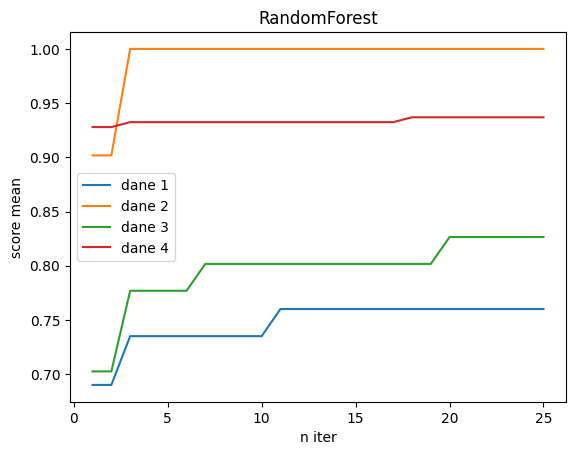

In [ ]:

ox = list(range(1,26))
# Utwórz wykresy
plt.plot(ox, val_rf_1, label='dane 1')
plt.plot(ox, val_rf_2, label='dane 2')
plt.plot(ox, val_rf_3, label='dane 3')
plt.plot(ox, val_rf_4, label='dane 4')

# Dodaj tytuł i etykiety osi
plt.title('RandomForest')
plt.xlabel('n iter')
plt.ylabel('score mean')

# Dodaj legendę
plt.legend()

# Wyświetl wykres
plt.show()

SVM dopasowanie

In [118]:
#data1
val = []
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

configspace = ConfigurationSpace(grid_svm_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25)
sma = HyperparameterOptimizationFacade(scenario, svm_to_opt,overwrite=True,callbacks=[CustomCallback()])
svm_bayes_opt_1= sma.optimize()
print(f"najlepsze par dla svm dane 1: {svm_bayes_opt_1.get_dictionary()}")
score_svm_1_bayes = svm_to_opt(svm_bayes_opt_1)
print(score_svm_1_bayes)
val_svm_1 = val.copy()

#data2
val = []

X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test

configspace = ConfigurationSpace(grid_svm_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25)
sma = HyperparameterOptimizationFacade(scenario, svm_to_opt,overwrite=True,callbacks=[CustomCallback()])
svm_bayes_opt_2= sma.optimize()
print(f"najlepsze par dla svm dane 2: {svm_bayes_opt_2.get_dictionary()}")
score_svm_2_bayes = svm_to_opt(svm_bayes_opt_2)
print(score_svm_2_bayes)
val_svm_2= val.copy()

#data3
val = []
X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test = y3_test

configspace = ConfigurationSpace(grid_svm_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25)
sma = HyperparameterOptimizationFacade(scenario, svm_to_opt, overwrite=True,callbacks=[CustomCallback()])
svm_bayes_opt_3= sma.optimize()
print(f"najlepsze par dla svm dane 3: {svm_bayes_opt_3.get_dictionary()}")
score_svm_3_bayes = svm_to_opt(svm_bayes_opt_3)
print(score_svm_3_bayes)
val_svm_3 = val.copy()

#data4
val = []
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

configspace = ConfigurationSpace(grid_svm_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25)
sma = HyperparameterOptimizationFacade(scenario, svm_to_opt, overwrite=True,callbacks=[CustomCallback()])
svm_bayes_opt_4= sma.optimize()
print(f"najlepsze par dla svm dane 4: {svm_bayes_opt_4.get_dictionary()}")
score_svm_4_bayes = svm_to_opt(svm_bayes_opt_4)
print(score_svm_4_bayes)
val_svm_4 = val.copy()

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config d2c128 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 817105 and rejected config d2c128 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config 966702 and rejected config 817105 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
najlepsze par dla svm dane 1: {'model__C': 850.0237549215052, '

<ipython-input-118-bcb9308645b2>:12: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla svm dane 1: {svm_bayes_opt_1.get_dictionary()}")


-0.76
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config d2c128 as new incumbent because there are no incumbents yet.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
najlepsze par dla svm dane 2: {'model__C': 266.8858522846736, 'model__gamma': 62.05646954476833, 'model__kernel': 'poly', 'model__tol': 0.0021185505937980492}
-1.0
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additi

<ipython-input-118-bcb9308645b2>:29: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla svm dane 2: {svm_bayes_opt_2.get_dictionary()}")


[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
najlepsze par dla svm dane 3: {'model__C': 266.8858522846736, 'model__gamma': 62.05646954476833, 'model__kernel': 'poly', 'model__tol': 0.0021185505937980492}
-0.9834710743801653
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


<ipython-input-118-bcb9308645b2>:45: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla svm dane 3: {svm_bayes_opt_3.get_dictionary()}")


[INFO][abstract_intensifier.py:515] Added config d2c128 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 817105 and rejected config d2c128 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
najlepsze par dla svm dane 4: {'model__C': 860.4892920700834, 'model__gamma': 24.884581193327904, 'model__kernel': 'rbf', 'model__tol': 0.005595402156366967}
-0.9054054054054054


<ipython-input-118-bcb9308645b2>:61: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla svm dane 4: {svm_bayes_opt_4.get_dictionary()}")


In [119]:
dif_svm_bay_1 = score_mean_svm_1 + score_svm_1_bayes
dif_svm_bay_2 = score_mean_svm_2 + score_svm_2_bayes
dif_svm_bay_3 = score_mean_svm_3 + score_svm_3_bayes
dif_svm_bay_4 = score_mean_svm_4 + score_svm_4_bayes

tunability_svm_bayes = (dif_svm_bay_1 + dif_svm_bay_2 + dif_svm_bay_3 + dif_svm_bay_4)/4
print(tunability_svm_bayes)

0.01225160077432802


In [ ]:
print(val_svm_1)
print(val_svm_2)
print(val_svm_3)
print(val_svm_4)

[0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.8693693693693694, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369]


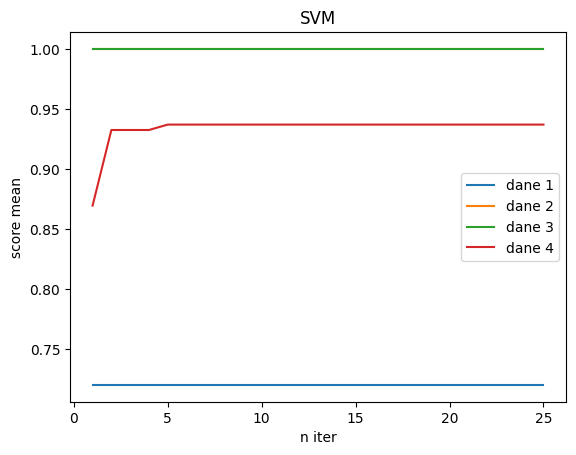

In [ ]:
ox = list(range(1,26))
# Utwórz wykresy
plt.plot(ox, val_svm_1, label='dane 1')
plt.plot(ox, val_svm_2, label='dane 2')
plt.plot(ox, val_svm_3, label='dane 3')
plt.plot(ox, val_svm_4, label='dane 4')

# Dodaj tytuł i etykiety osi
plt.title('SVM')
plt.xlabel('n iter')
plt.ylabel('score mean')

# Dodaj legendę
plt.legend()

# Wyświetl wykres
plt.show()

GB Dopasowanie

In [120]:
#data1
val = []
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

configspace = ConfigurationSpace(grid_gb_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25)
sma = HyperparameterOptimizationFacade(scenario, gb_to_opt, overwrite=True,callbacks=[CustomCallback()])
gb_bayes_opt_1= sma.optimize()
print(f"najlepsze par dla gb dane 1: {gb_bayes_opt_1.get_dictionary()}")
score_gb_1_bayes = gb_to_opt(gb_bayes_opt_1)
print(score_gb_1_bayes)
val_gb_1 = val.copy()

#data2
val = []
X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test

configspace = ConfigurationSpace(grid_gb_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25)
sma = HyperparameterOptimizationFacade(scenario, gb_to_opt, overwrite=True,callbacks=[CustomCallback()])
gb_bayes_opt_2= sma.optimize()
print(f"najlepsze par dla gb dane 2: {gb_bayes_opt_2.get_dictionary()}")
score_gb_2_bayes = gb_to_opt(gb_bayes_opt_2)
print(score_gb_2_bayes)
val_gb_2 = val.copy()

#data3
val = []
X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test = y3_test

configspace = ConfigurationSpace(grid_gb_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25)
sma = HyperparameterOptimizationFacade(scenario, gb_to_opt, overwrite=True,callbacks=[CustomCallback()])
gb_bayes_opt_3= sma.optimize()
print(f"najlepsze par dla gb dane 3: {gb_bayes_opt_3.get_dictionary()}")
score_gb_3_bayes = gb_to_opt(gb_bayes_opt_3)
print(score_gb_3_bayes)
val_gb_3 = val.copy()

#data4
val = []
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

configspace = ConfigurationSpace(grid_gb_prep1)
scenario = Scenario(configspace, deterministic=True, n_trials=25)
sma = HyperparameterOptimizationFacade(scenario, gb_to_opt, overwrite=True,callbacks=[CustomCallback()])
gb_bayes_opt_4= sma.optimize()
print(f"najlepsze par dla gb dane 4: {gb_bayes_opt_4.get_dictionary()}")
score_gb_4_bayes = gb_to_opt(gb_bayes_opt_4)
print(score_gb_4_bayes)
val_gb_4 = val.copy()

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 16bca9 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 4bfb82 and rejected config 16bca9 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config f35a29 and rejected config 4bfb82 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
najlepsze par dla gb dane 1: {'model__loss': 'log_loss', 'model

<ipython-input-120-a7d06e0f6b53>:12: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla gb dane 1: {gb_bayes_opt_1.get_dictionary()}")


-0.81
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 16bca9 as new incumbent because there are no incumbents yet.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
najlepsze par dla gb dane 2: {'model__loss': 'log_loss', 'model__max_depth': 1557, 'model__min_impurity_decrease': 0.0010750788170844317, 'model__min_samples_leaf': 5, 'model__n_estimators': 2154, 'model__subsample': 0.47578472338616845}


<ipython-input-120-a7d06e0f6b53>:28: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla gb dane 2: {gb_bayes_opt_2.get_dictionary()}")


-1.0
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 16bca9 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 4bfb82 and rejected config 16bca9 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
najlepsze par dla gb dane 3: {'model__loss': 'exponential', 'model__max_depth': 281, 'model__min_impurity_decrease': 0.009892357727512718, 'model__min_samples_leaf': 17, 'model__n_estimators': 983, 'model__subsample

<ipython-input-120-a7d06e0f6b53>:44: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla gb dane 3: {gb_bayes_opt_3.get_dictionary()}")


-1.0
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 6 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 6 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 16bca9 as new incumbent because there are no incumbents yet.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
najlepsze par dla gb dane 4: {'model__loss': 'log_loss', 'model__max_depth': 1557, 'model__min_impurity_decrease': 0.0010750788170844317, 'model__min_samples_leaf': 5, 'model__n_estimators': 2154, 'model__subsample': 0.47578472338616845}


<ipython-input-120-a7d06e0f6b53>:60: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  print(f"najlepsze par dla gb dane 4: {gb_bayes_opt_4.get_dictionary()}")


-0.9009009009009009


In [121]:
dif_gb_bay_1 = score_mean_gb_1 + score_gb_1_bayes
dif_gb_bay_2 = score_mean_gb_2 + score_gb_2_bayes
dif_gb_bay_3 = score_mean_gb_3 + score_gb_3_bayes
dif_gb_bay_4 = score_mean_gb_4 + score_gb_4_bayes

tunability_gb_bayes = (dif_gb_bay_1 + dif_gb_bay_2 + dif_gb_bay_3 + dif_gb_bay_4)/4
print(tunability_gb_bayes)

0.002252252252252257


In [ ]:
print(dif_gb_bay_1)
print(dif_gb_bay_2)
print(dif_gb_bay_3)
print(dif_gb_bay_4)

[0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02
 0.035 0.035 0.035 0.035 0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04
 0.04 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[-0.04132231  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
[-0.01351351 -0.01351351 -0.0045045  -0.0045045  -0.0045045   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]


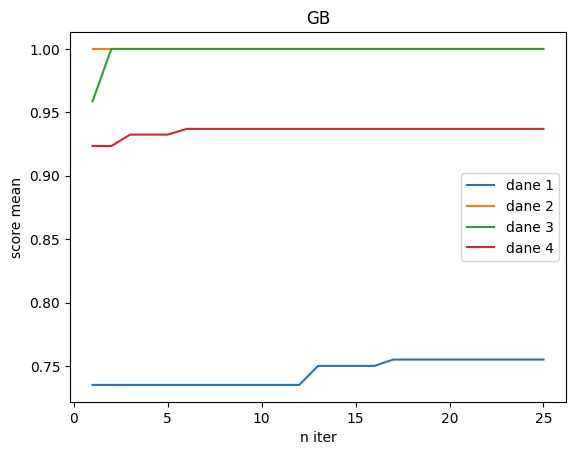

In [ ]:
ox = list(range(1,26))
# Utwórz wykresy
plt.plot(ox, val_gb_1, label='dane 1')
plt.plot(ox, val_gb_2, label='dane 2')
plt.plot(ox, val_gb_3, label='dane 3')
plt.plot(ox, val_gb_4, label='dane 4')

# Dodaj tytuł i etykiety osi
plt.title('GB')
plt.xlabel('n iter')
plt.ylabel('score mean')

# Dodaj legendę
plt.legend()

# Wyświetl wykres
plt.show()

Tunowalnosc

<BarContainer object of 6 artists>

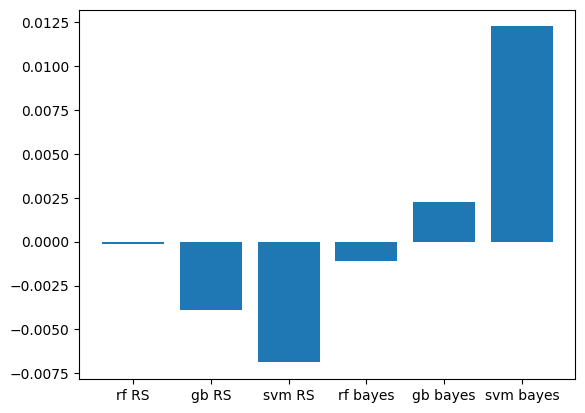

In [134]:
plt.bar(['rf RS', 'gb RS', 'svm RS','rf bayes',  'gb bayes', 'svm bayes'],[tunability_rf, tunability_gb, tunability_svm, tunability_rf_bayes, tunability_gb_bayes, tunability_svm_bayes])

Testy czy score otrzymane za pomocą randomizedSearchCV i metodą bayesa pochodzą z tego samego rozkładu

In [135]:
from scipy.stats import ks_2samp

# Przykładowe dane

statystyka_rf1, p_val_rf1 = ks_2samp(res_rf_1['mean_test_score'], np.maximum.accumulate(val_rf_1))
print('RandomForest dane 1')
print("Statystyka testowa KS:", statystyka_rf1)
print("P-wartość:", p_val_rf1)

statystyka_rf2, p_val_rf2 = ks_2samp(res_rf_2['mean_test_score'], np.maximum.accumulate(val_rf_2))
print('RandomForest dane 2')
print("Statystyka testowa KS:", statystyka_rf2)
print("P-wartość:", p_val_rf2)

statystyka_rf3, p_val_rf3 = ks_2samp(res_rf_3['mean_test_score'], np.maximum.accumulate(val_rf_3))
print('RandomForest dane 3')
print("Statystyka testowa KS:", statystyka_rf3)
print("P-wartość:", p_val_rf3)

statystyka_rf4, p_val_rf4 = ks_2samp(res_rf_4['mean_test_score'], np.maximum.accumulate(val_rf_4))
print('RandomForest dane 4')
print("Statystyka testowa KS:", statystyka_rf4)
print("P-wartość:", p_val_rf4)

statystyka_svm1, p_val_svm1 = ks_2samp(res_svm_1['mean_test_score'], np.maximum.accumulate(val_svm_1))
print('SVM dane 1')
print("Statystyka testowa KS:", statystyka_svm1)
print("P-wartość:", p_val_svm1)

statystyka_svm2, p_val_svm2 = ks_2samp(res_svm_2['mean_test_score'], np.maximum.accumulate(val_svm_2))
print('SVM dane 2')
print("Statystyka testowa KS:", statystyka_svm2)
print("P-wartość:", p_val_svm2)

statystyka_svm3, p_val_svm3 = ks_2samp(res_svm_3['mean_test_score'], np.maximum.accumulate(val_svm_3))
print('SVM dane 3')
print("Statystyka testowa KS:", statystyka_svm3)
print("P-wartość:", p_val_svm3)

statystyka_svm4, p_val_svm4 = ks_2samp(res_svm_4['mean_test_score'], np.maximum.accumulate(val_svm_4))
print('SVM dane 4')
print("Statystyka testowa KS:", statystyka_svm4)
print("P-wartość:", p_val_svm4)

statystyka_gb1, p_val_gb1 = ks_2samp(res_gb_1['mean_test_score'], np.maximum.accumulate(val_gb_1))
print('GradientBoosting dane 1')
print("Statystyka testowa KS:", statystyka_gb1)
print("P-wartość:", p_val_gb1)

statystyka_gb2, p_val_gb2 = ks_2samp(res_gb_2['mean_test_score'], np.maximum.accumulate(val_gb_2))
print('GradientBoosting dane 2')
print("Statystyka testowa KS:", statystyka_gb2)
print("P-wartość:", p_val_gb2)

statystyka_gb3, p_val_gb3 = ks_2samp(res_gb_3['mean_test_score'], np.maximum.accumulate(val_gb_3))
print('GradientBoosting dane 3')
print("Statystyka testowa KS:", statystyka_gb3)
print("P-wartość:", p_val_gb3)

statystyka_gb4, p_val_gb4 = ks_2samp(res_gb_4['mean_test_score'], np.maximum.accumulate(val_gb_4))
print('GradientBoosting dane 4')
print("Statystyka testowa KS:", statystyka_gb4)
print("P-wartość:", p_val_gb4)

RandomForest dane 1
Statystyka testowa KS: 1.0
P-wartość: 1.582145720489723e-14
RandomForest dane 2
Statystyka testowa KS: 0.64
P-wartość: 3.963961206425733e-05
RandomForest dane 3
Statystyka testowa KS: 0.8
P-wartość: 3.352187066744806e-08
RandomForest dane 4
Statystyka testowa KS: 1.0
P-wartość: 1.582145720489723e-14
SVM dane 1
Statystyka testowa KS: 0.96
P-wartość: 7.910728602448615e-13
SVM dane 1
Statystyka testowa KS: 0.64
P-wartość: 3.963961206425733e-05
SVM dane 1
Statystyka testowa KS: 0.72
P-wartość: 1.580316760036837e-06
SVM dane 1
Statystyka testowa KS: 0.76
P-wartość: 2.514140300058604e-07
GradientBoosting dane 1
Statystyka testowa KS: 1.0
P-wartość: 1.582145720489723e-14
GradientBoosting dane 1
Statystyka testowa KS: 0.52
P-wartość: 0.001920719384568105
GradientBoosting dane 1
Statystyka testowa KS: 0.96
P-wartość: 7.910728602448615e-13
GradientBoosting dane 1
Statystyka testowa KS: 0.76
P-wartość: 2.514140300058604e-07


Sprawdzamy czy Bayes przyjmuje średnio większe wartości niż randomizedsearchCv

In [137]:
from scipy.stats import ranksums

In [139]:

statystyka_rf1, p_val_rf1 = ranksums(res_rf_1['mean_test_score'], np.maximum.accumulate(val_rf_1), alternative= 'less')
print('RandomForest dane 1')
print("Statystyka testowa Wilcoxon:", statystyka_rf1)
print("P-wartość:", p_val_rf1)

statystyka_rf2, p_val_rf2 = ranksums(res_rf_2['mean_test_score'], np.maximum.accumulate(val_rf_2) , alternative= 'less')
print('RandomForest dane 2')
print("Statystyka testowa Wilcoxon:", statystyka_rf2)
print("P-wartość:", p_val_rf2)

statystyka_rf3, p_val_rf3 = ranksums(res_rf_3['mean_test_score'], np.maximum.accumulate(val_rf_3), alternative= 'less')
print('RandomForest dane 3')
print("Statystyka testowa Wilcoxon:", statystyka_rf3)
print("P-wartość:", p_val_rf3)

statystyka_rf4, p_val_rf4 = ranksums(res_rf_4['mean_test_score'], np.maximum.accumulate(val_rf_4), alternative= 'less')
print('RandomForest dane 4')
print("Statystyka testowa Wilcoxon:", statystyka_rf4)
print("P-wartość:", p_val_rf4)

statystyka_svm1, p_val_svm1 = ranksums(res_svm_1['mean_test_score'], np.maximum.accumulate(val_svm_1), alternative= 'less')
print('SVM dane 1')
print("Statystyka testowa Wilcoxon:", statystyka_svm1)
print("P-wartość:", p_val_svm1)

statystyka_svm2, p_val_svm2 = ranksums(res_svm_2['mean_test_score'], np.maximum.accumulate(val_svm_2), alternative= 'less')
print('SVM dane 1')
print("Statystyka testowa Wilcoxon:", statystyka_svm2)
print("P-wartość:", p_val_svm2)

statystyka_svm3, p_val_svm3 = ranksums(res_svm_3['mean_test_score'], np.maximum.accumulate(val_svm_3), alternative= 'less')
print('SVM dane 1')
print("Statystyka testowa Wilcoxon:", statystyka_svm3)
print("P-wartość:", p_val_svm3)

statystyka_svm4, p_val_svm4 = ranksums(res_svm_4['mean_test_score'], np.maximum.accumulate(val_svm_4), alternative= 'less')
print('SVM dane 1')
print("Statystyka testowa Wilcoxon:", statystyka_svm4)
print("P-wartość:", p_val_svm4)

statystyka_gb1, p_val_gb1 = ranksums(res_gb_1['mean_test_score'], np.maximum.accumulate(val_gb_1), alternative= 'less')
print('GradientBoosting dane 1')
print("Statystyka testowa KS:", statystyka_gb1)
print("P-wartość:", p_val_gb1)

statystyka_gb2, p_val_gb2 = ranksums(res_gb_2['mean_test_score'], np.maximum.accumulate(val_gb_2), alternative= 'less')
print('GradientBoosting dane 1')
print("Statystyka testowa Wilcoxon:", statystyka_gb2)
print("P-wartość:", p_val_gb2)

statystyka_gb3, p_val_gb3 = ranksums(res_gb_3['mean_test_score'], np.maximum.accumulate(val_gb_3), alternative= 'less')
print('GradientBoosting dane 1')
print("Statystyka testowa Wilcoxon:", statystyka_gb3)
print("P-wartość:", p_val_gb3)

statystyka_gb4, p_val_gb4 = ranksums(res_gb_4['mean_test_score'], np.maximum.accumulate(val_gb_4), alternative= 'less')
print('GradientBoosting dane 1')
print("Statystyka testowa Wilcoxon:", statystyka_gb4)
print("P-wartość:", p_val_gb4)

RandomForest dane 1
Statystyka testowa Wilcoxon: -6.063390625908324
P-wartość: 6.66407147027036e-10
RandomForest dane 2
Statystyka testowa Wilcoxon: -3.2887830754926752
P-wartość: 0.0005031077138389427
RandomForest dane 3
Statystyka testowa Wilcoxon: -4.860413925728113
P-wartość: 5.857028370855434e-07
RandomForest dane 4
Statystyka testowa Wilcoxon: 6.063390625908324
P-wartość: 0.9999999993335928
SVM dane 1
Statystyka testowa Wilcoxon: -6.024584925902511
P-wartość: 8.477208118445542e-10
SVM dane 1
Statystyka testowa Wilcoxon: -3.8805700005813275
P-wartość: 5.210597257904449e-05
SVM dane 1
Statystyka testowa Wilcoxon: -2.6678918753996625
P-wartość: 0.0038164408938961493
SVM dane 1
Statystyka testowa Wilcoxon: 3.2693802254897686
P-wartość: 0.9994610832079034
GradientBoosting dane 1
Statystyka testowa KS: -6.063390625908324
P-wartość: 6.66407147027036e-10
GradientBoosting dane 1
Statystyka testowa Wilcoxon: -3.1529631254723287
P-wartość: 0.0008081111075299929
GradientBoosting dane 1
Staty